<a href="https://colab.research.google.com/github/aishwarya602/Machine_Learning/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Practical 10 - Implement K-means clustering algorithm

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = datasets.load_iris()
X = iris.data
y_true = iris.target

In [ ]:
#create dataframe
df  = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#k-means clustering from k = 3
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
#cluster assignment
labels = kmeans.labels_
print("\nCluster labels assigned to each data point:\n", labels[:20])


Cluster labels assigned to each data point:
 [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1]


In [ ]:
#analyze the result
df["Cluster"] = labels
print("\nClustered data sample:\n")
print(df.head(10))


Clustered data sample:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  
5        1  
6        1  
7

In [ ]:
#evaluate clustering performance
print("\nInertia (sum of squared distances to closest cluster center):", kmeans)
silhouette_avg = silhouette_score(X_scaled, labels)
print("\nSilhouette score:", round(silhouette_avg, 3))


Inertia (sum of squared distances to closest cluster center): KMeans(n_clusters=3, random_state=42)

Silhouette score: 0.48


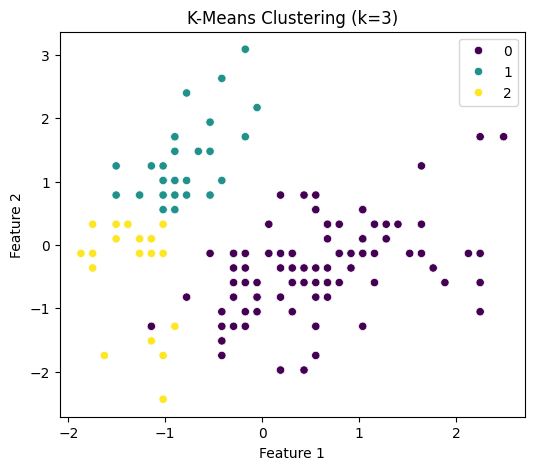

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis')
plt.title("K-Means Clustering (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

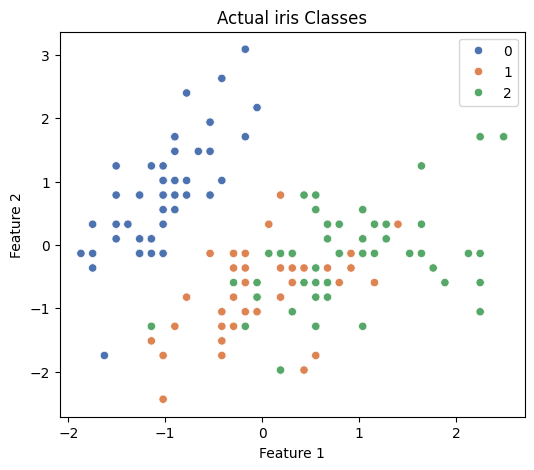

In [ ]:
#compare with true labels
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_true, palette='deep')
plt.title("Actual iris Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
#find the best number of clusters
inertia_values = []
k_range = range(1,11)

In [ ]:
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia_values.append(kmeans.inertia_)

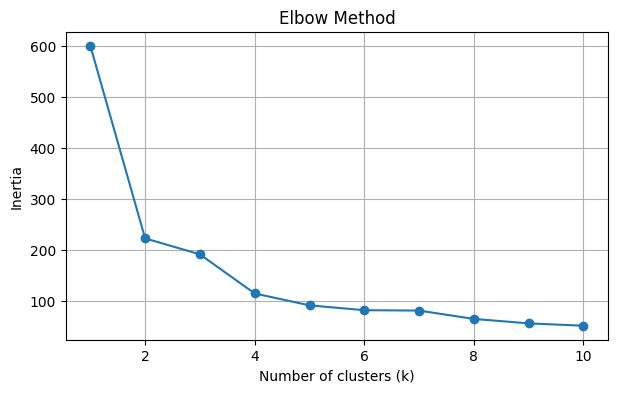

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()